In [1]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv("../data/raw/data.csv",
                 parse_dates=['Fecha'],
                 index_col='Fecha')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1994-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exportaciones  336 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

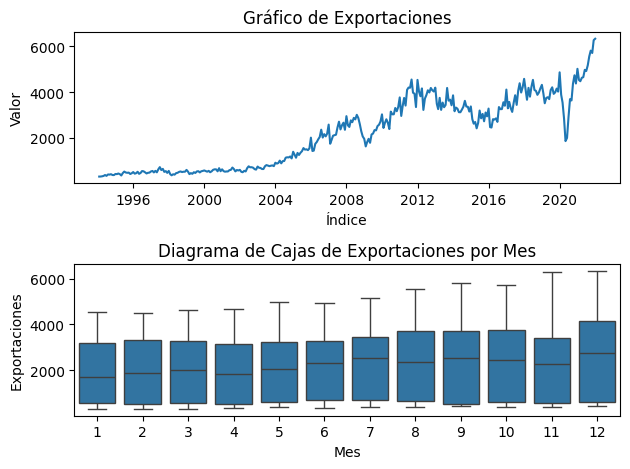

In [77]:
# Configurar la disposición de los subgráficos
plt.subplot(2, 1, 1)

# Crear el primer gráfico
plt.plot(df["Exportaciones"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico de Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Cambiar a la siguiente celda de la cuadrícula
plt.subplot(2, 1, 2)

# Crear un diagrama de cajas para cada mes
sns.boxplot(x=df.index.month, y=df['Exportaciones'])

# Configurar el título y etiquetas del eje
plt.title('Diagrama de Cajas de Exportaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Exportaciones')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Descomposición multiplicativa:

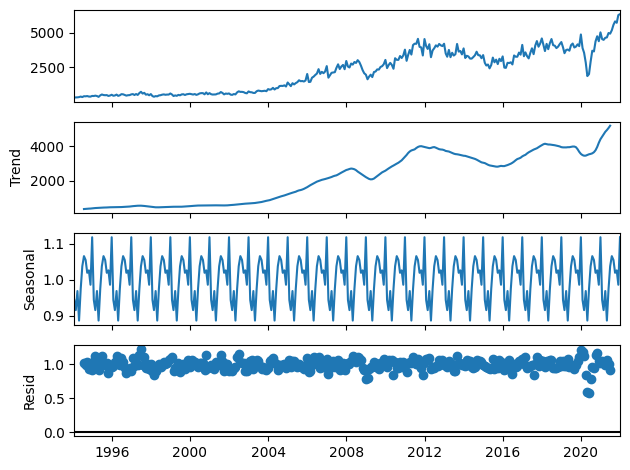

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomposed = seasonal_decompose(
    df,
    model='mul'
)

df_decomposed.plot()
plt.show()

Descomposición aditiva:

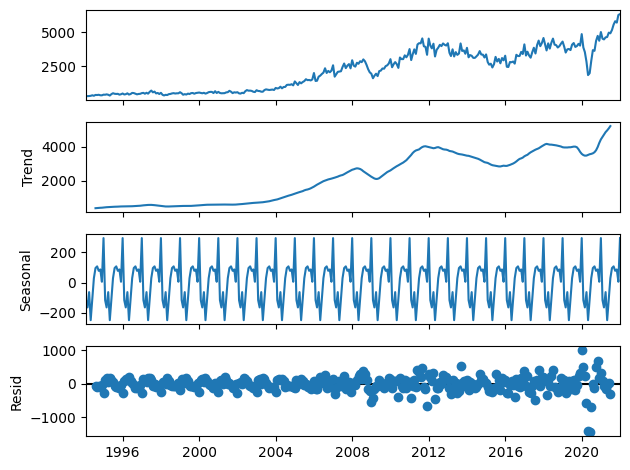

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomposed = seasonal_decompose(
    df,
    model='add'
)

df_decomposed.plot()
plt.show()

Descomposición mostrada de manera aislada:

<Axes: xlabel='Fecha'>

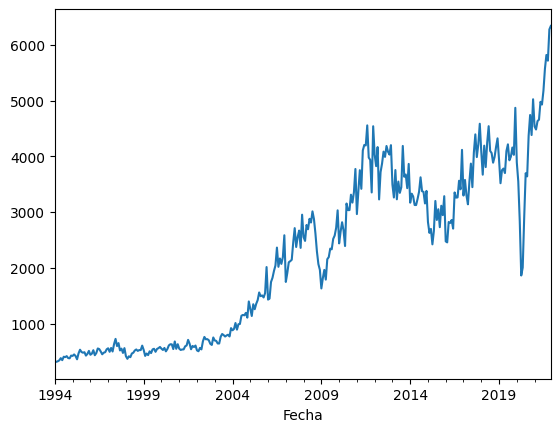

In [80]:
observada = df_decomposed.observed
observada.plot()

<Axes: xlabel='Fecha'>

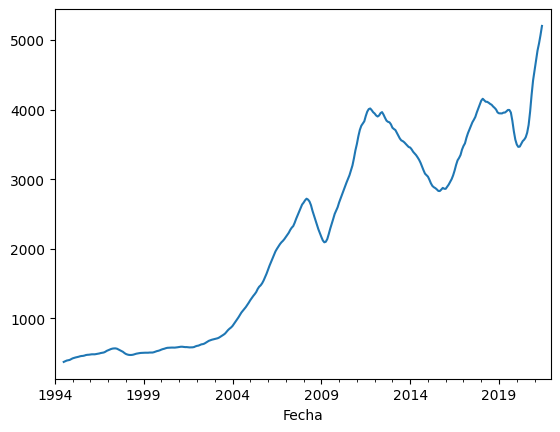

In [81]:
tendencia = df_decomposed.trend
tendencia.plot()

<Axes: xlabel='Fecha'>

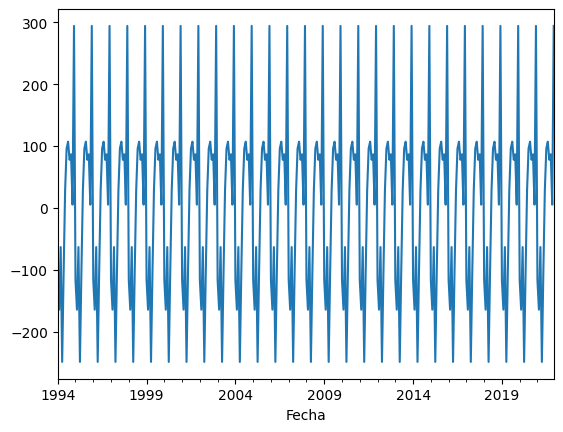

In [82]:
estacionalidad = df_decomposed.seasonal
estacionalidad.plot()

<Axes: xlabel='Fecha'>

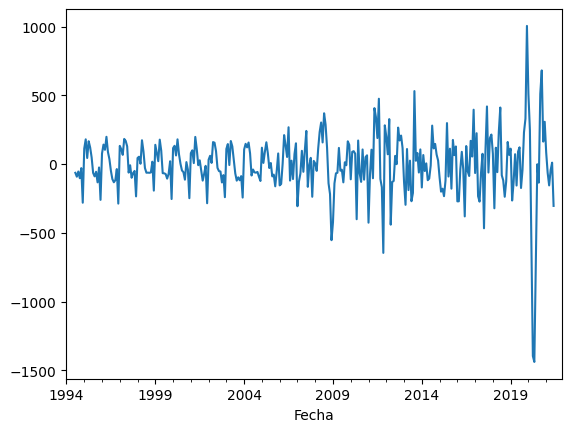

In [83]:
residuos = df_decomposed.resid
residuos.plot()

Componentes de una serie temporal:

In [84]:
componentes = pd.concat([observada, tendencia, estacionalidad, residuos], axis=1)
componentes

,0,trend,seasonal,resid
Fecha,,,,
1994-01-31,312.705970,NaN,-116.551326,NaN
1994-02-28,314.740923,NaN,-164.338959,NaN
1994-03-31,324.470030,NaN,-63.219101,NaN
1994-04-30,341.008845,NaN,-248.780338,NaN
1994-05-31,380.045522,NaN,-102.971781,NaN
...,...,...,...,...
2021-08-31,5568.497659,NaN,107.025228,NaN
2021-09-30,5818.521684,NaN,77.795427,NaN
2021-10-31,5715.738609,NaN,86.673470,NaN


Estabilización de la variabilidad de la serie temporal:

In [20]:
df['log_Exportaciones'] = np.log(df['Exportaciones'])

<Axes: xlabel='Fecha'>

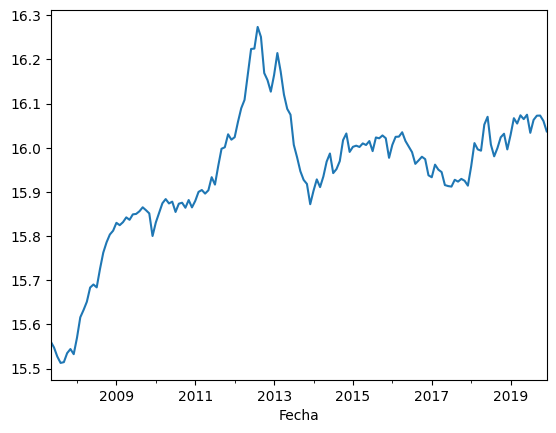

In [21]:
df['log_Exportaciones'].plot()

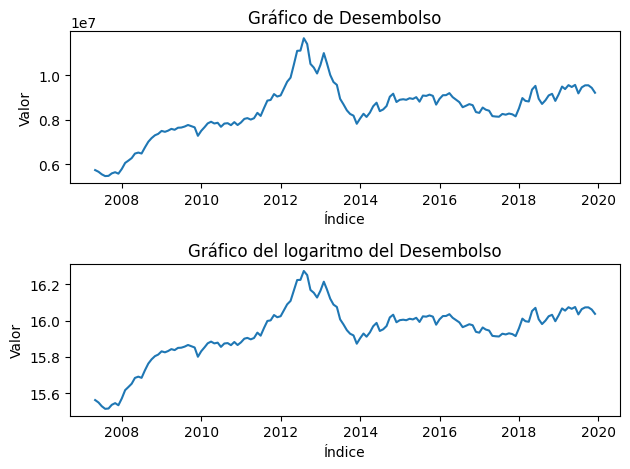

In [22]:
# Configurar la disposición de los subgráficos
plt.subplot(2, 1, 1)

# Crear el primer gráfico
plt.plot(df["Exportaciones"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico de Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Cambiar a la siguiente celda de la cuadrícula
plt.subplot(2, 1, 2)

# Crear el segundo gráfico
plt.plot(df["log_Exportaciones"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico del logaritmo del Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Primera diferencia de la serie temporal:

<Axes: xlabel='Fecha'>

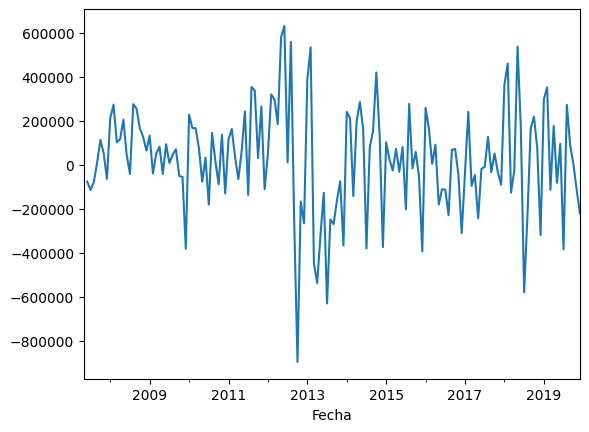

In [26]:
# Calcular la primera diferencia de la columna 'Desembolo'
df['Exportaciones_1raDiferencia'] = df['Exportaciones'].diff()

# Mostrar la primera diferencia
df['Exportaciones_1raDiferencia'].plot()

Eliminando estacionalidad de la serie:

<Axes: xlabel='Fecha'>

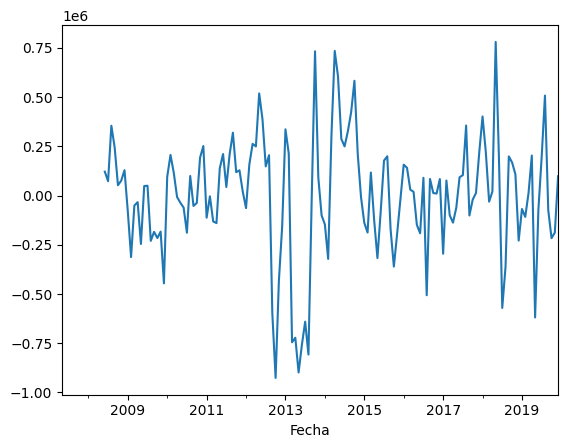

In [28]:
# Calcular la diferencia entre cada valor y el valor que está 12 pasos atrás
df['tsstationary'] = df['Exportaciones_1raDiferencia'].diff(periods=12)
df['tsstationary'].plot()